In [ ]:
#@title Text Font
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '15px'
      rule.style.color = 'black'
      break
    }
  }
  '''))
increase_font()
get_ipython().events.register('pre_run_cell', increase_font)

<IPython.core.display.Javascript object>

# Task: 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
import pydot
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report


%matplotlib inline
# df = pd.read_csv('diabetes.csv')

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv').dropna()

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info();

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The above dataset contains data about female patients of Pima Indian heritage and their diabetes status. It has eight input features and one target column indicating whether the patient has diabetes or not.

# Task: 2 - shape of the dataset

In [ ]:
print (f'Diabetes dataframe shape is : {df.shape};')

<IPython.core.display.Javascript object>

Diabetes dataframe shape is : (768, 9);


# Task: 3

In [ ]:
print (f'column Names are: {df.columns}')

<IPython.core.display.Javascript object>

column Names are: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


The dataset has eight features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Outcome. 

1. Pregnancies column represents the number of times the patient has been pregnant.
2. Glucose column represents the patient's glucose level.
3. BloodPressure column represents the patient's blood pressure.
4. SkinThickness column represents the thickness of the patient's skin.
5. Insulin column represents the patient's insulin level. 
6. BMI column represents the patient's body mass index.
7. DiabetesPedigreeFunction column represents a function that measures the patient's genetic predisposition to diabetes.
8. Outcome column represents whether the patient has diabetes or not (0 = no, 1 = yes).

In [ ]:
df.head()

<IPython.core.display.Javascript object>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Task: 4**

In [ ]:
# df = df.iloc[:,[8,0,1,2,3,4,5,6,7]] 
# 'Outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', and 'DiabetesPedigreeFunction', 'Age'

<IPython.core.display.Javascript object>

In [ ]:
# Reorder columns using loc
df = df.loc[:, ['Outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']]
print(df.columns)

<IPython.core.display.Javascript object>

Index(['Outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


**The Glucose, BloodPressure, SkinThickness, Insulin and BMI columns in the Pima Indian Diabetes dataset cannot have zero values since it is not physically possible for these measures to be zero. Therefore, we should remove any rows in the dataset that have a zero value in these columns.**

In [ ]:
drop_content = df[(df['Glucose'] == 0) | (df['BloodPressure'] == 0) | (df['SkinThickness'] == 0) | (df['Insulin'] == 0) | (df['BMI'] == 0)].index
df.drop(drop_content, inplace = True)

<IPython.core.display.Javascript object>

In [ ]:
df.head()
print(df.shape)

<IPython.core.display.Javascript object>

(392, 9)


# **Task: 5**

In [ ]:
print("Basic summary of dataset:")
print(df.describe())

<IPython.core.display.Javascript object>

Basic summary of dataset:
          Outcome  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  392.000000   392.000000  392.000000     392.000000     392.000000   
mean     0.331633     3.301020  122.627551      70.663265      29.145408   
std      0.471401     3.211424   30.860781      12.496092      10.516424   
min      0.000000     0.000000   56.000000      24.000000       7.000000   
25%      0.000000     1.000000   99.000000      62.000000      21.000000   
50%      0.000000     2.000000  119.000000      70.000000      29.000000   
75%      1.000000     5.000000  143.000000      78.000000      37.000000   
max      1.000000    17.000000  198.000000     110.000000      63.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  392.000000  392.000000                392.000000  392.000000  
mean   156.056122   33.086224                  0.523046   30.864796  
std    118.841690    7.027659                  0.345488   10.200777  
min     1

**Target column is Outcome**

In [ ]:
print(df['Outcome'].value_counts())

<IPython.core.display.Javascript object>

0    262
1    130
Name: Outcome, dtype: int64


# **Task: 6**

<IPython.core.display.Javascript object>

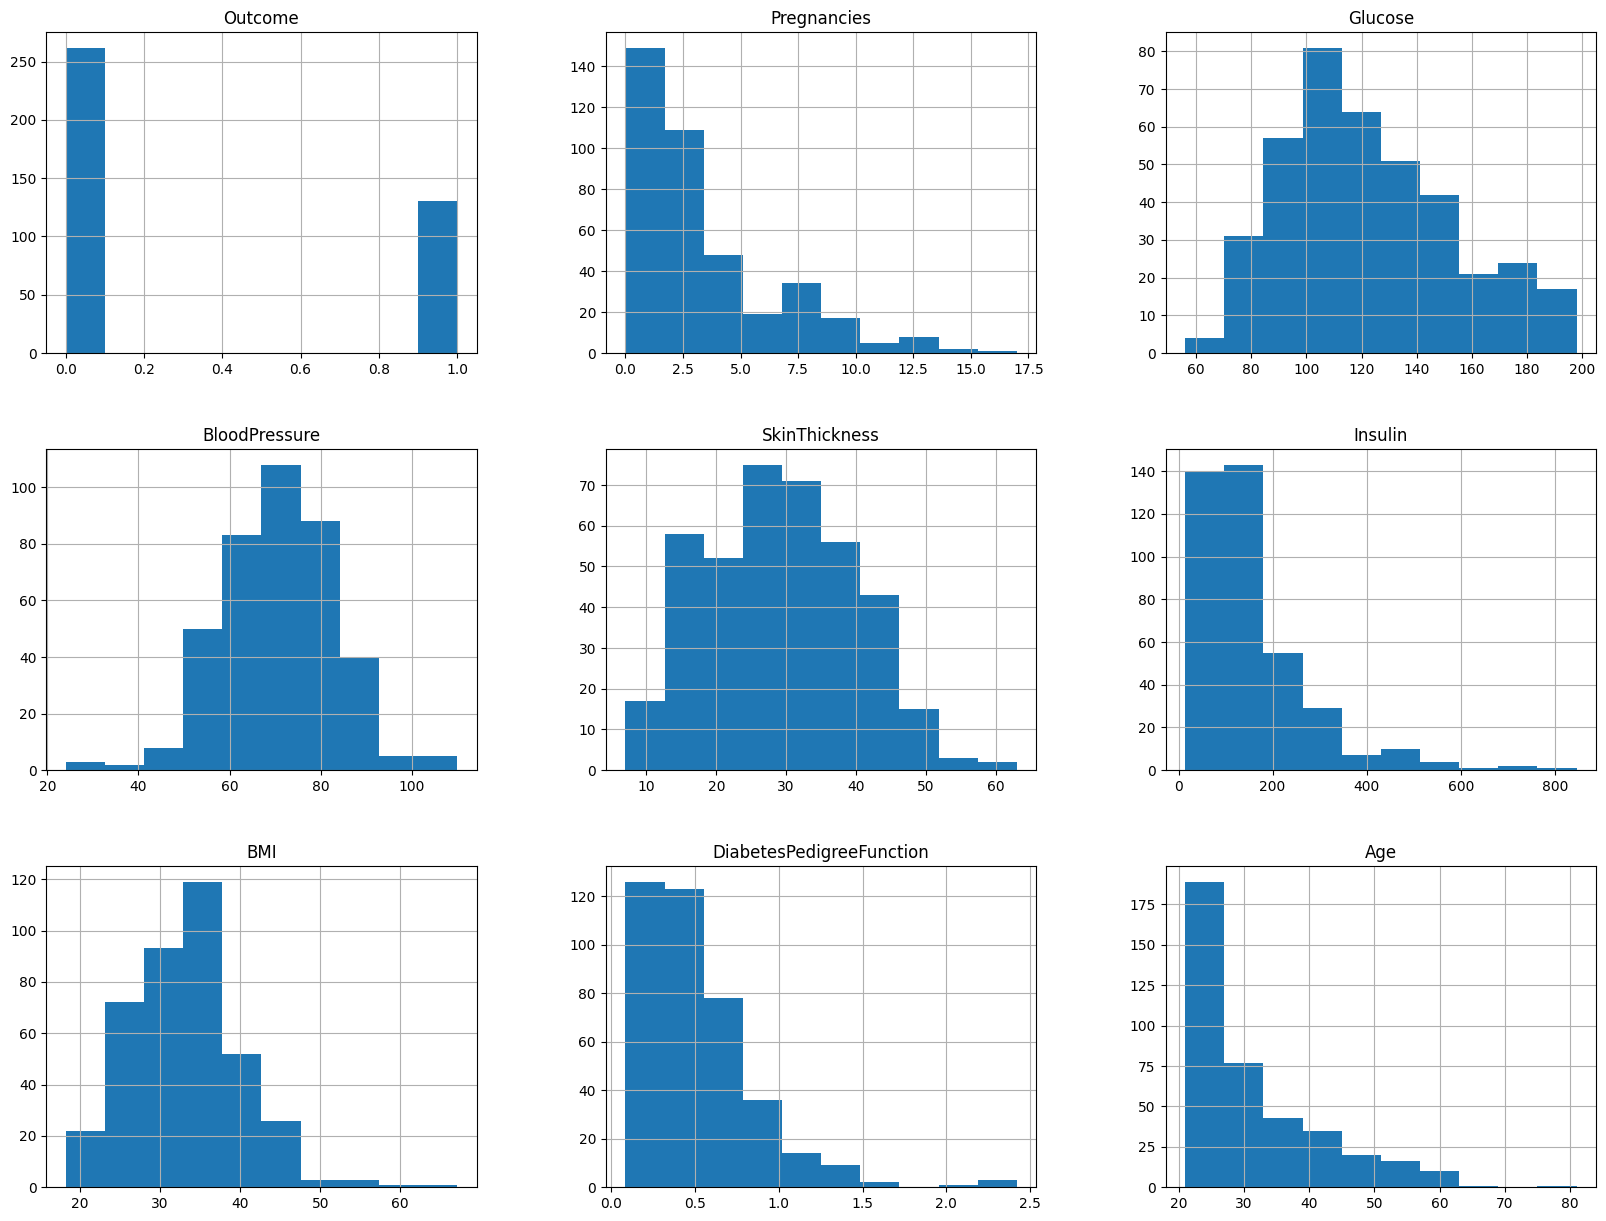

In [ ]:
plt.rcParams['figure.figsize'] = [20, 15]
df.hist();

In [ ]:
# df1 = df.loc[:, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']]
df1 = df.drop('Outcome', axis = 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

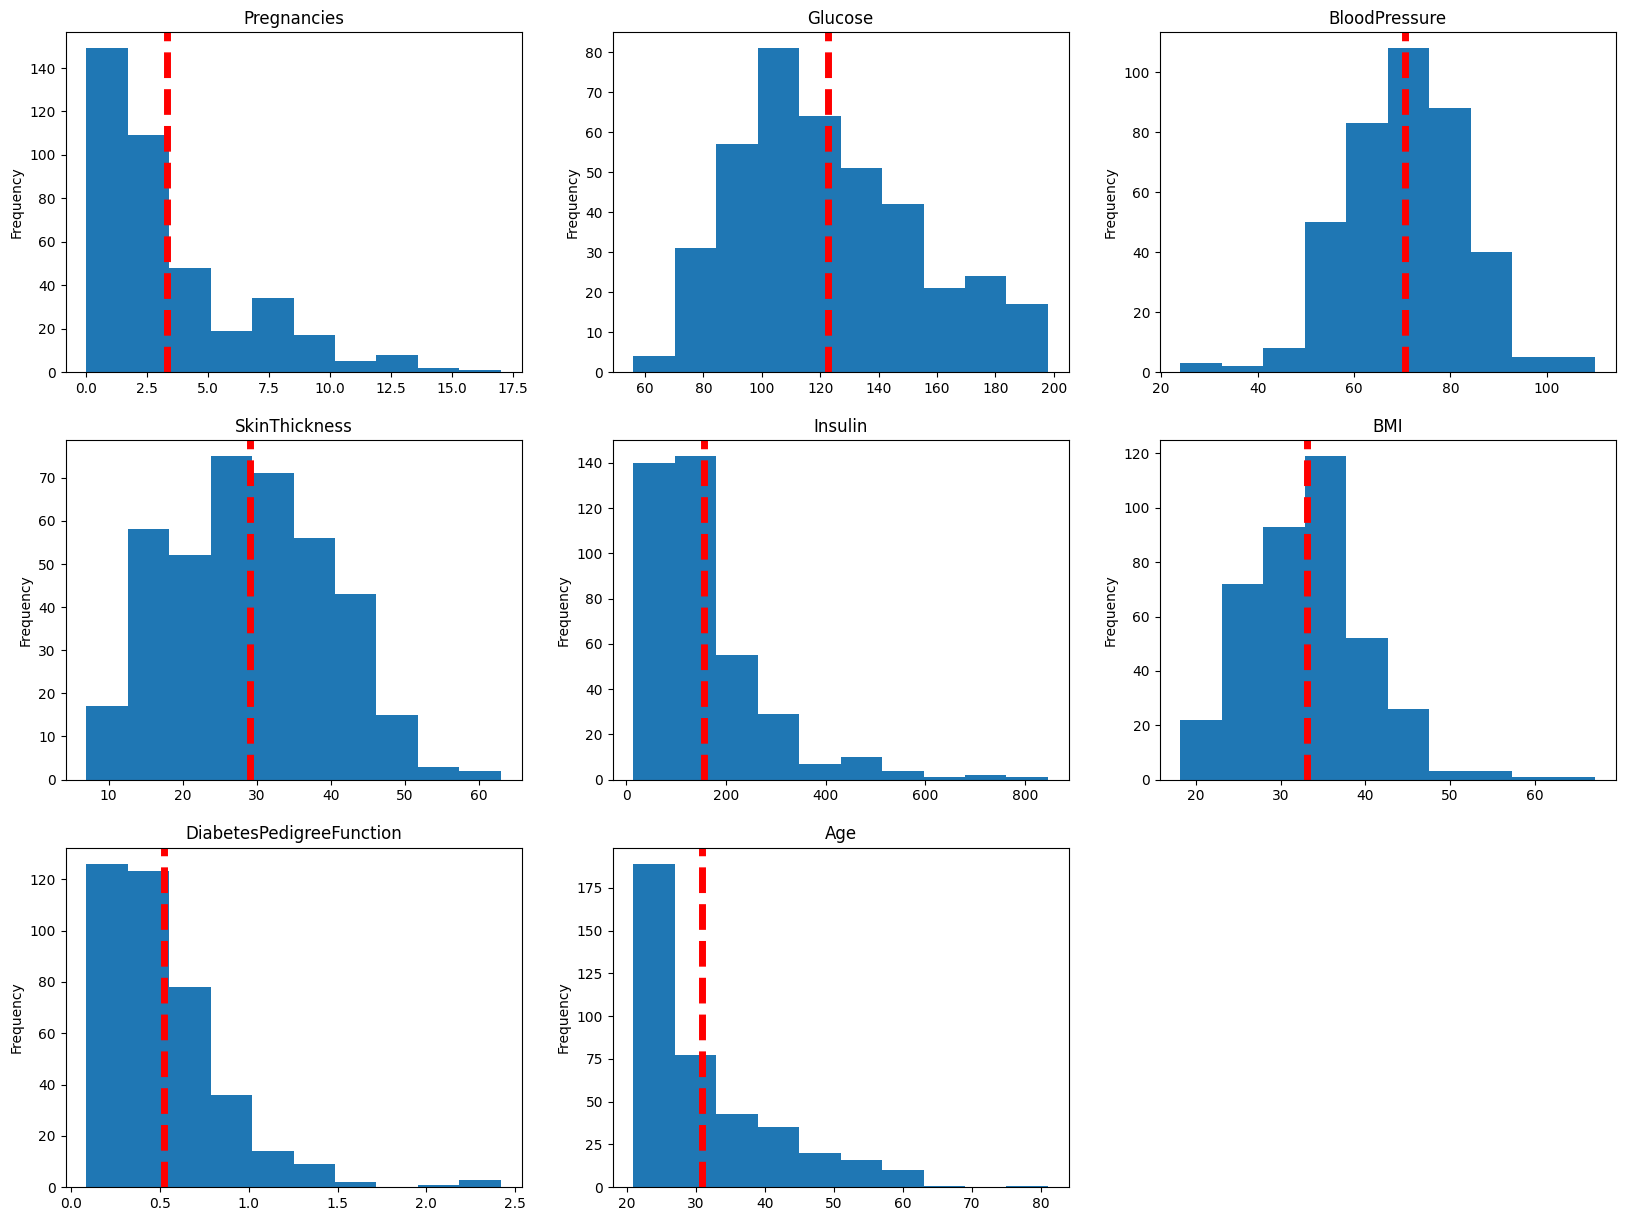

In [ ]:
plt.rcParams['figure.figsize'] = [20, 15]
for i in range(len(df1.columns)):
    col = df1.columns[i]
    plt.subplot(3, 3, i+1)
    plt.hist(df1[col])
    plt.axvline(df1[col].mean(), color='red', linestyle='dashed', linewidth=5)
    plt.ylabel("Frequency")
    plt.title(col)
plt.show()

# **Task: 7**

In [ ]:
print("Skewness of features:")
for col in df1.columns:
    print(col, ":", skew(df1[col]))

<IPython.core.display.Javascript object>

Skewness of features:
Pregnancies : 1.3304801259488703
Glucose : 0.5158662585125094
BloodPressure : -0.087181150814928
SkinThickness : 0.208509019823441
Insulin : 2.15682248102243
BMI : 0.660943506900395
DiabetesPedigreeFunction : 1.9515966245480323
Age : 1.3982298822442265


1.   The mean is a measure of central tendency that represents the typical value in a set of data, while skewness is a measure of the asymmetry of a distribution.
2.    Skewness indicates how much a distribution deviates from symmetry, with positive skewness indicating a longer tail on the right side and negative skewness indicating a longer tail on the left side.




# **Task: 8**

<IPython.core.display.Javascript object>

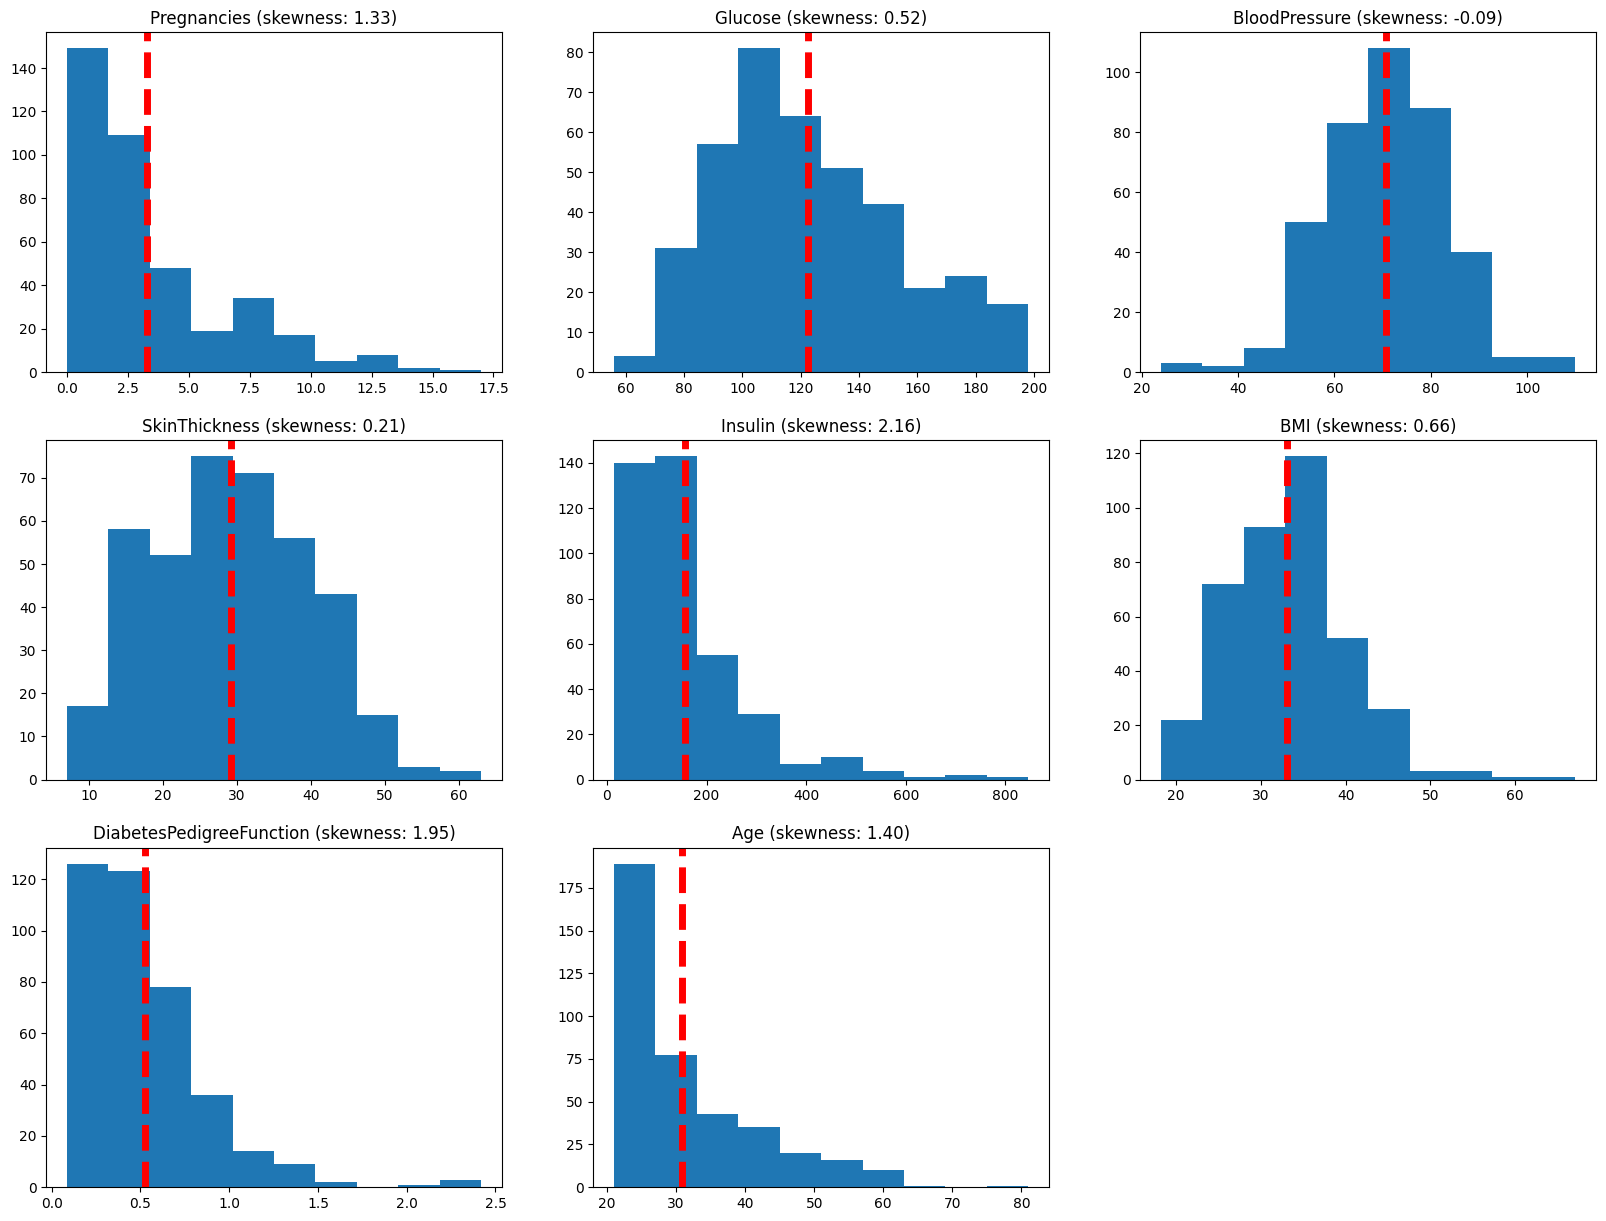

In [ ]:
plt.figure(figsize=(20, 15))
cols = df1.columns
for i in range(len(cols)):
    col = cols[i]
    plt.subplot(3, 3, i+1)
    # plt.hist(df1[col],bins = df.shape[0])
    plt.hist(df1[col])
    plt.axvline(df1[col].mean(), color='red', linestyle='dashed', linewidth=5)
    plt.title(col + " (skewness: {:.2f})".format(skew(df1[col])))
plt.show()

Inferences:
1. The features 'Pregnancies', 'Glucose', 'BloodPressure', and 'BMI' have a normal distribution.
2. The features 'SkinThickness' and 'Insulin' are right-skewed.
3. The feature 'DiabetesPedigreeFunction' has a heavily right-skewed distribution.

Most of the features in the diabetes dataset are positively skewed with a long tail on the positive side, indicating that they have more low values and fewer high values. These patterns and inferences can provide valuable insights for decision makers who want to understand the characteristics of the dataset and how it may affect the performance of machine learning models.

<IPython.core.display.Javascript object>

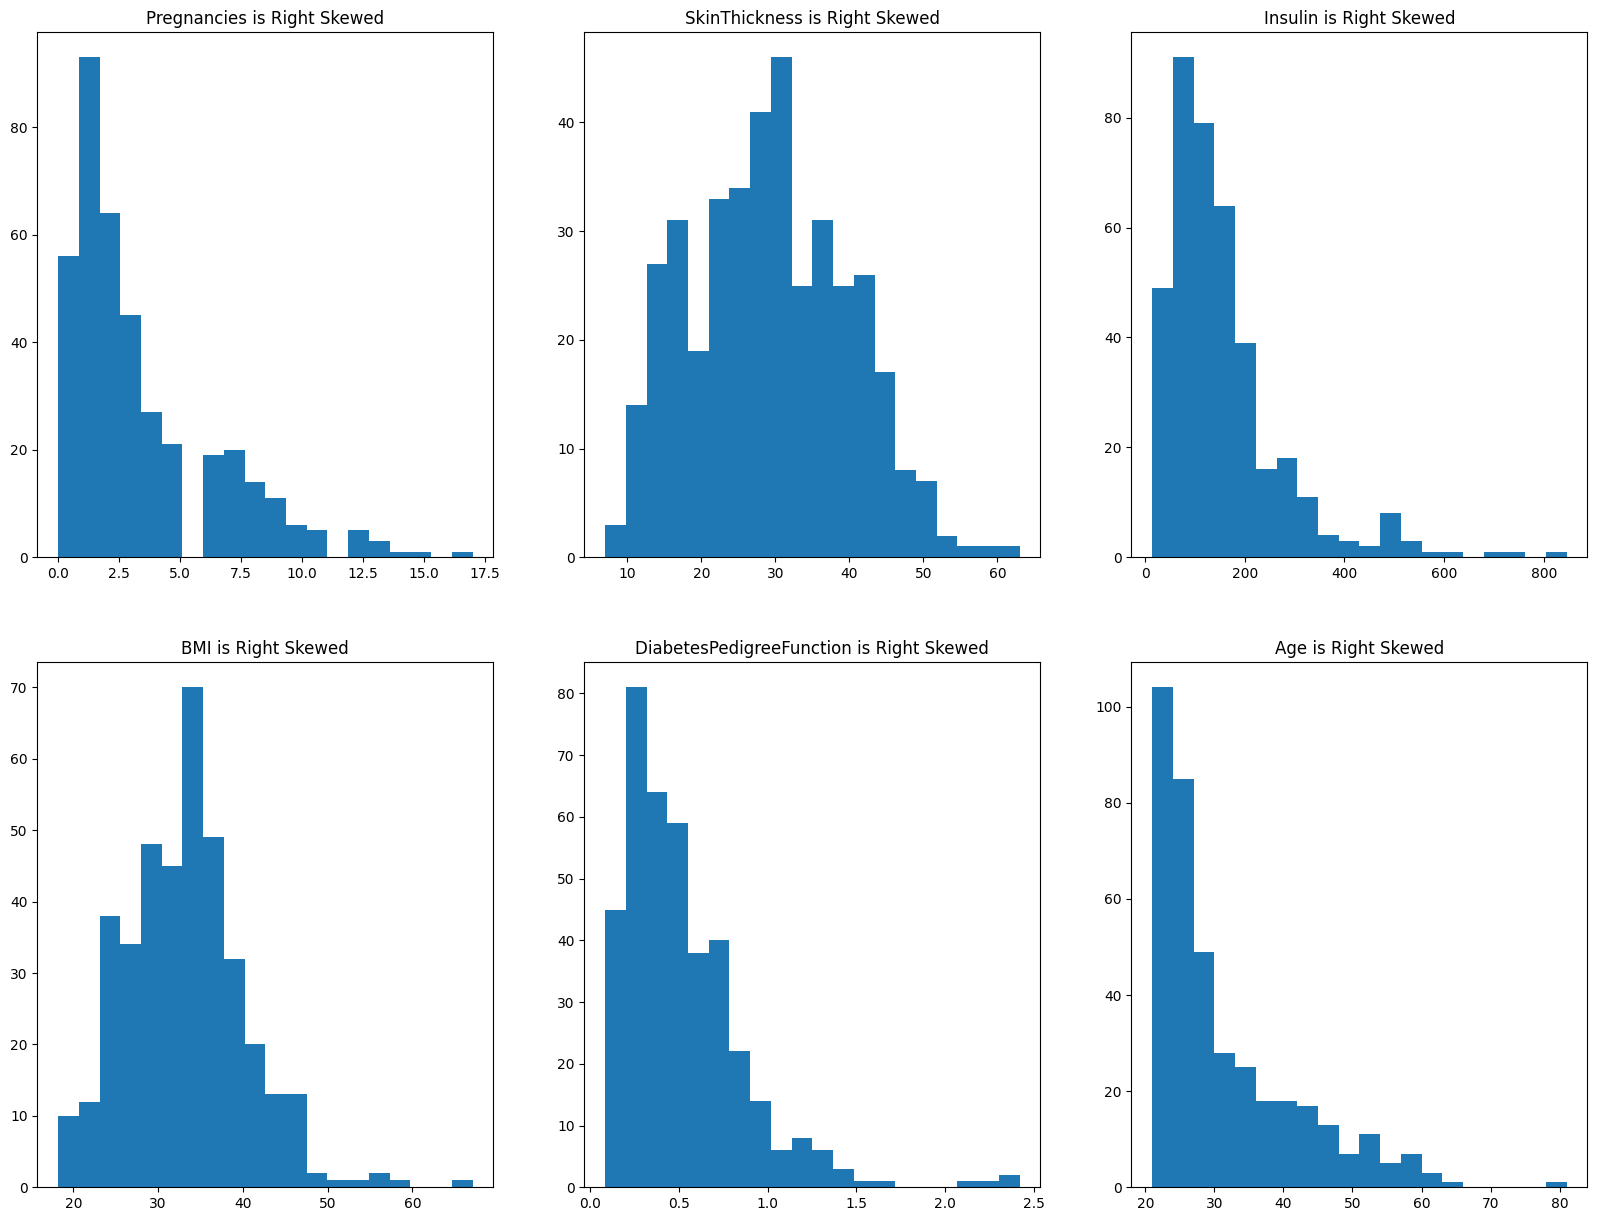

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

axes[0, 0].hist(df1['Pregnancies'], bins=20)
axes[0, 0].set_title('Pregnancies is Right Skewed')

axes[0, 1].hist(df1['SkinThickness'], bins=20)
axes[0, 1].set_title('SkinThickness is Right Skewed')

axes[0, 2].hist(df1['Insulin'], bins=20)
axes[0, 2].set_title('Insulin is Right Skewed')

axes[1, 0].hist(df1['BMI'], bins=20)
axes[1, 0].set_title('BMI is Right Skewed')

axes[1, 1].hist(df1['DiabetesPedigreeFunction'], bins=20)
axes[1, 1].set_title('DiabetesPedigreeFunction is Right Skewed')

axes[1, 2].hist(df1['Age'], bins=20)
axes[1, 2].set_title('Age is Right Skewed')

plt.show()

# **Task: 9**

In [ ]:
X = df.drop('Outcome', axis = 1)
Y = df['Outcome']

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

<IPython.core.display.Javascript object>

30% of the data will be used for testing and 70% for training

# **Task: 10**

In [ ]:
DTC = DecisionTreeClassifier(criterion='gini', 
                             max_depth=3,
                             min_samples_leaf=1,
                              min_samples_split=2,  
                             random_state=42)
DTC.fit(X_train, Y_train)

<IPython.core.display.Javascript object>

DecisionTreeClassifier(max_depth=3, random_state=42)

Criterion is 'gini', which is used to minimize the impurity of the nodes.

A higher value may lead to overfitting & a lower value may lead to underfitting. set it to 3 to limit the depth of the tree.

The random_state parameter in the DecisionTreeClassifier method specifies a fixed seed for the random number generator used to select features at each split, which ensures that the results are reproducible.


# **Task: 11**

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
export_graphviz(DTC, out_file='diabetes_tree.dot',
                feature_names=feature_names,
                class_names=['No diabetes', 'Diabetes'],
                rounded=True, filled=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

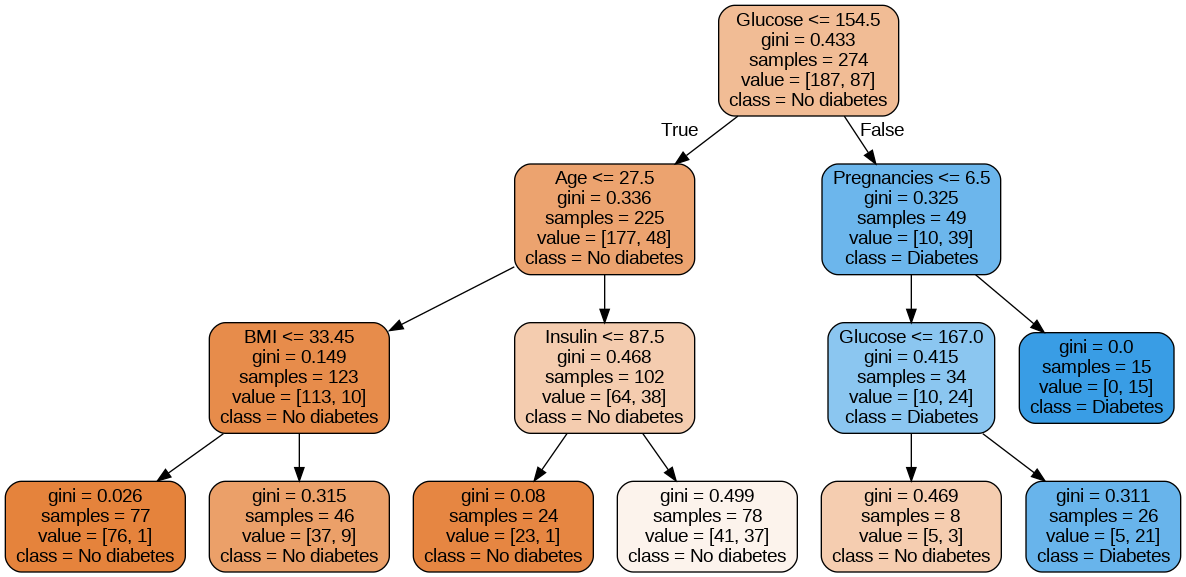

In [ ]:
!dot -Tpng diabetes_tree.dot -o diabetes_tree.png
Image(filename='diabetes_tree.png')




![]("/content/diabetes_tree.png"

The decision tree model for the Pima Indian diabetes dataset classifies patients based on their glucose level, BMI, age, and other factors.
the top split assigns observations having glucose levels ≤ 154.5 to the left branch. The gini value for this split is 0.448, which indicates that the purity of the left branch is relatively low. The class assigned to this region is "no diabetes". The tree consists of nodes and branches, where each node represents a test on an input feature and each branch represents the outcome of that test. 

The regions can be described as follows:
 
**Left Branch**

The left branch split observations having $age \le 28.5$, $gini = 0.3538$, class = No diabetes.
This arrow shows TRUE, which means the logical condition of featues is holds TRUE for this branch. and the left branch is further split into age ≤ 28.5 and age > 28.5.

**Right Branch**

The right branch is split by $DiabetesPedigreeFunction \le 0.141$, $gini = 0.223$, class = diabetes. The arrow show FALSE, which means the logical condition of featues is FALSE.

**Overall View**
The tree stratifies or segments the patients into different regions of predictor space based on their glucose levels, age, and DiabetesPedigreeFunction values. The tree model uses the values of these to classify patients as having diabetes or not. The tree splits the input feature space into regions based on these values, and assigns each patient to the region that corresponds to their feature values. By following the branches of the tree from the root to the leaves, we can see the sequence of decision rules that the model uses to classify instances.

<IPython.core.display.Javascript object>

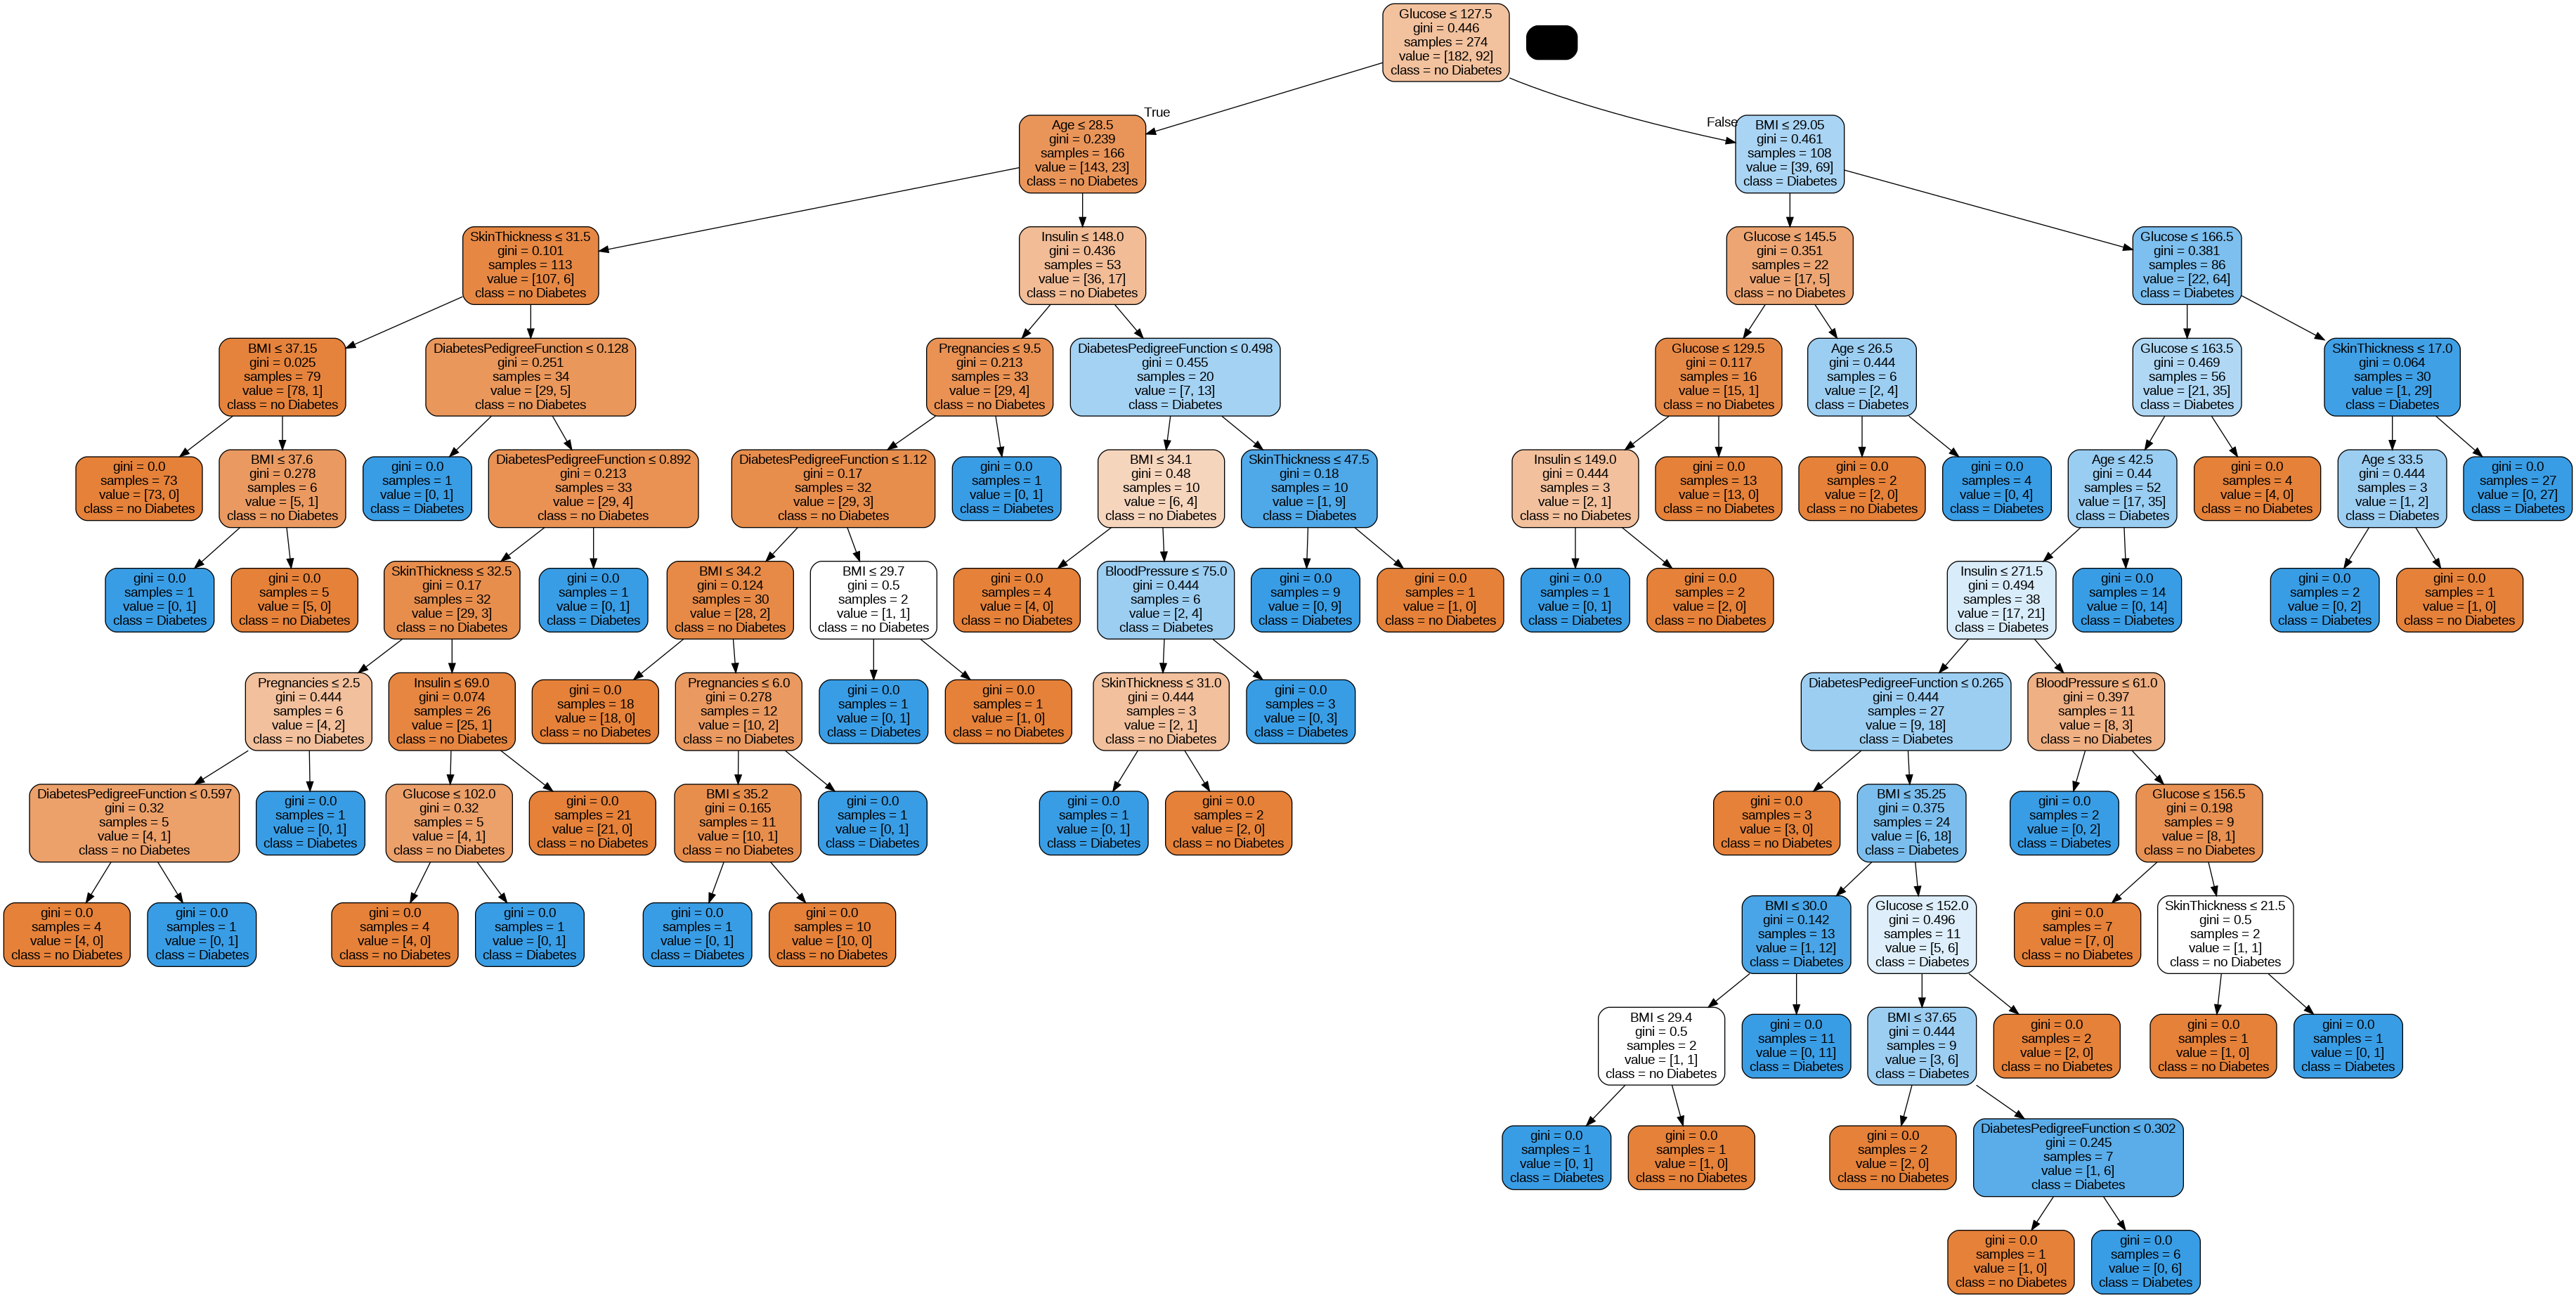

In [ ]:
#@title DTC
from sklearn.tree import DecisionTreeClassifier
#creating a decision tree classifer with default hyperparameters
dt=DecisionTreeClassifier()
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
#fitting decision tree classifier to training data
dt.fit(X_train,Y_train)
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dot_data=export_graphviz(dt,out_file=None,
                         feature_names=feature_names,
                         class_names=['no Diabetes','Diabetes'],
                         filled=True,rounded=True,
                         special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# **Task: 12**

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt.fit(X_train, Y_train)

Y_pred = dt.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy score:", accuracy*100)

<IPython.core.display.Javascript object>

Accuracy score: 76.27118644067797


# **Task: 13**

Entropy - Accuracy 77%

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt.fit(X_train, Y_train)

Y_pred = dt.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy score:", accuracy)

<IPython.core.display.Javascript object>

Accuracy score: 0.7711864406779662


Squared Error - Accuracy 30%

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_poisson_deviance, mean_squared_error

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, Y_train)
Y_pred_dt = dt_regressor.predict(X_test)
mse_dt = mean_squared_error(Y_test, Y_pred_dt)
print("Decision Tree Regressor MSE:", mse_dt)

<IPython.core.display.Javascript object>

Decision Tree Regressor MSE: 0.3050847457627119


<IPython.core.display.Javascript object>

Accuracy: 0.7627118644067796
Accuracy: 0.7457627118644068


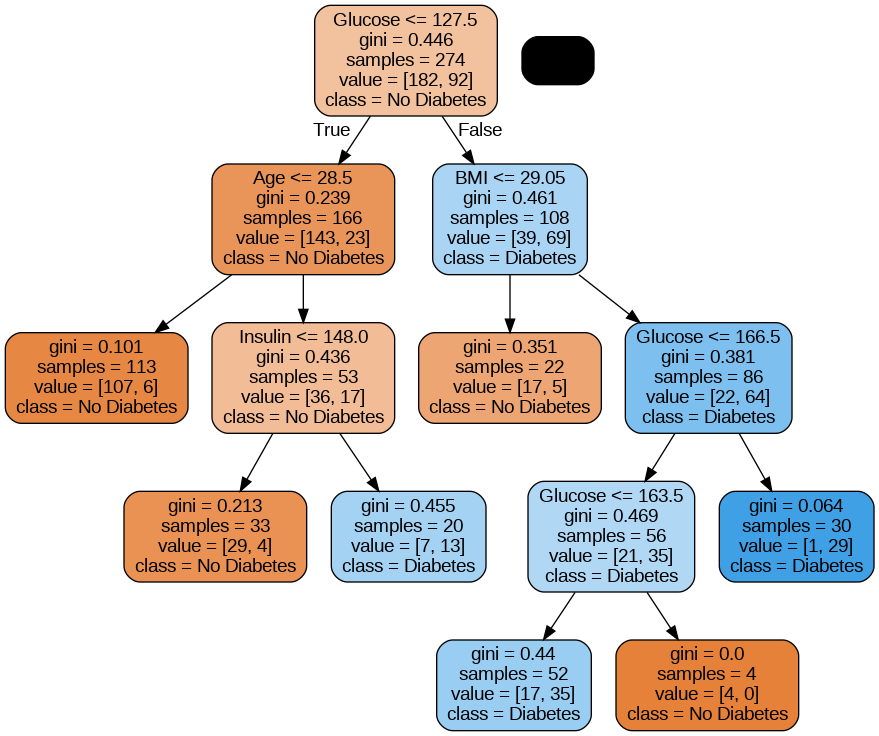

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, Y_train)
Y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)


tree_clf2 = DecisionTreeClassifier(max_leaf_nodes=7, min_samples_split=2)
tree_clf2.fit(X_train, Y_train)
Y_pred2 = tree_clf2.predict(X_test)
accuracy2 = accuracy_score(Y_test, Y_pred2)
print("Accuracy:", accuracy2)

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
dot_data = export_graphviz(tree_clf2, out_file=None, 
                           feature_names=X.columns, 
                           class_names=['No Diabetes', 'Diabetes'], 
                           rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())


<IPython.core.display.Javascript object>

Accuracy: 0.7627118644067796


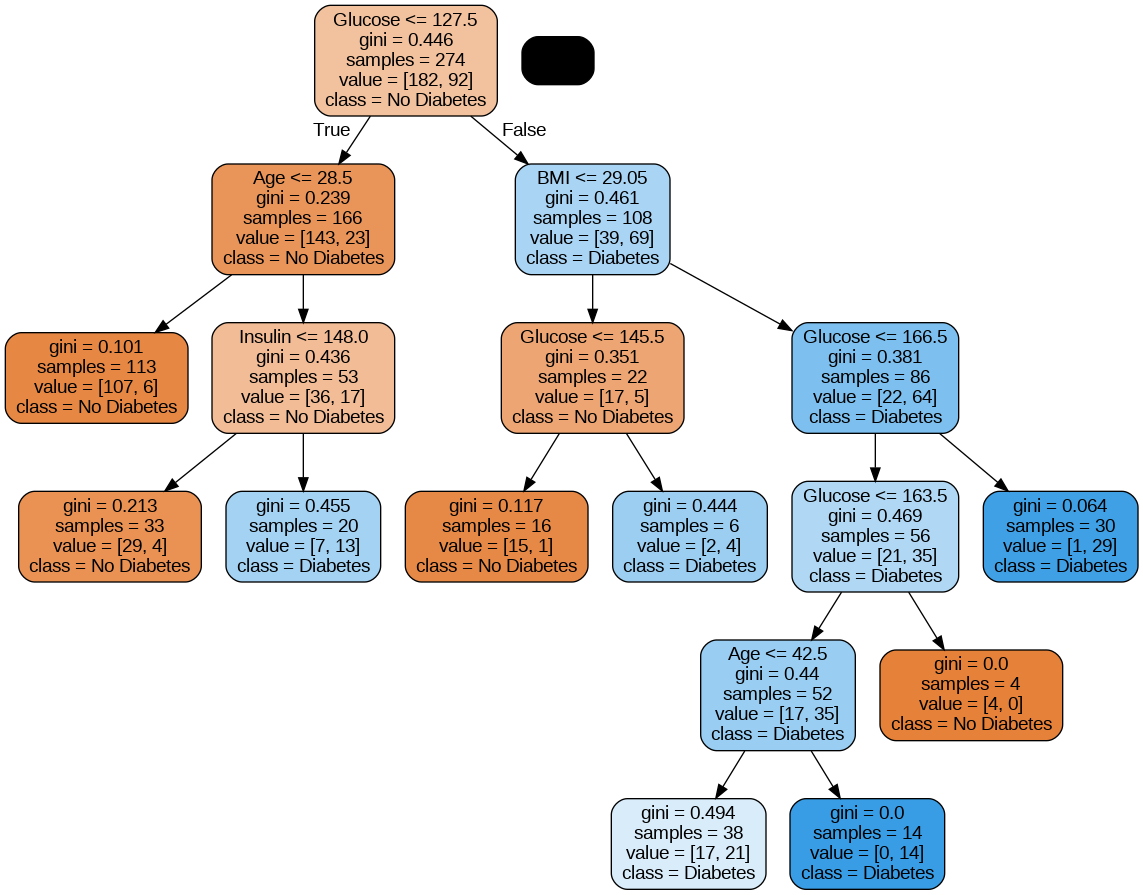

In [ ]:
tree_clf3 = DecisionTreeClassifier(max_leaf_nodes=9, min_samples_split=2)
tree_clf3.fit(X_train, Y_train)
Y_pred2 = tree_clf3.predict(X_test)
accuracy2 = accuracy_score(Y_test, Y_pred2)
print("Accuracy:", accuracy2)

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
dot_data = export_graphviz(tree_clf3, out_file=None, 
                           feature_names=X.columns, 
                           class_names=['No Diabetes', 'Diabetes'], 
                           rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

Random Forest is an ensemble learning method that combines multiple decision trees to produce a better model. In contrast to a single decision tree, a random forest creates a set of decision trees from randomly selected subsets of the training data, and then averages their predictions.

Each decision tree in a random forest may have a different structure than the others, due to the random selection of features and training examples.

Compared to a single decision tree, a random forest is less prone to overfitting.

The tree structure of a random forest may be more complex due to the ensemble of trees, but the individual trees may be simpler due to the random selection of features and training examples.

we can generate another decision tree model by changing the hyperparameters of the decision tree classifier. For example, we can set the max_depth hyperparameter to limit the maximum depth of the tree. changing the hyperparameters can have an impact on the tree structure and accuracy. For instance , setting max_depth to a lower value can result in a smaller tree with less depth but might lead to a lower accuracy. on the other hand, setting max_depth to ahigher value can result in a larger tree with more depth but miht lead to overfitting and lower accuracy on the testing data.

For diffrent models I got diffrent accuracies 
in the gini model I have taken diffrent values for max_leaf_nodes & min_samples_split to verify I got diffrent accuracy at each run